In [1]:
import numpy as np
import pandas as pd
from PIL import Image

In [7]:
df_can = pd.read_excel('Canada.xlsx',
                      sheet_name = 'Canada by Citizenship',
                      skiprows = range(20),
                      skipfooter = 2)
print(df_can)

           Type    Coverage          OdName  AREA AreaName   REG  \
0    Immigrants  Foreigners     Afghanistan   935     Asia  5501   
1    Immigrants  Foreigners         Albania   908   Europe   925   
2    Immigrants  Foreigners         Algeria   903   Africa   912   
3    Immigrants  Foreigners  American Samoa   909  Oceania   957   
4    Immigrants  Foreigners         Andorra   908   Europe   925   
..          ...         ...             ...   ...      ...   ...   
190  Immigrants  Foreigners        Viet Nam   935     Asia   920   
191  Immigrants  Foreigners  Western Sahara   903   Africa   912   
192  Immigrants  Foreigners           Yemen   935     Asia   922   
193  Immigrants  Foreigners          Zambia   903   Africa   910   
194  Immigrants  Foreigners        Zimbabwe   903   Africa   910   

                RegName  DEV             DevName  1980  ...  2012  2013  \
0         Southern Asia  902  Developing regions    16  ...  2635  2004   
1       Southern Europe  901   De

In [8]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print(df_can.shape)

(195, 51)


In [10]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis = 1, inplace = True)
df_can.rename(columns = {'OdName' : 'Country', 'AreaName' : 'Continent', 'RegName' : 'Region'}, inplace = True)
df_can.columns = list(map(str, df_can.columns))
df_can.set_index('Country', inplace = True)
df_can['Total'] = df_can.sum(axis = 1)

years = list(map(str, range (1980, 2014)))

print('data dimensions:', df_can.shape)

data dimensions: (195, 46)


In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

mpl.style.use('ggplot')

print('Marplotlib version:', mpl.__version__)

Marplotlib version: 3.3.4


In [12]:
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3901.0
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2327.0
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5866.0


In [13]:
total_values = sum(df_dsn['Total'])
category_proportions = [(float(value)/total_values) for value in df_dsn['Total']]

for i, proportion in enumerate(category_proportions):
    print(df_dsn.index.values[i] + ':' + str(proportion))

Denmark:0.32255663965602777
Norway:0.1924094592359848
Sweden:0.48503390110798744


In [15]:
width = 40
height = 10

total_num_tiles = width * height

print('Total number of tiles is', total_num_tiles)

Total number of tiles is 400


In [19]:
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

for i, tiles in enumerate(tiles_per_category):
    print (df_dsn.index.values[i] + ': ' + str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


In [20]:
waffle_chart = np.zeros((height, width))

category_index = 0
tile_index = 0

for col in range(width):
    for row in range(height):
        tile_index += 1
        
        if tile_index > sum(tiles_per_category[0: category_index]):
            category_index +1
            
        waffle_chart[row, col] = category_index
        
print('Waffle chart populated')

Waffle chart populated


In [21]:
waffle_chart

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   

<Figure size 432x288 with 0 Axes>

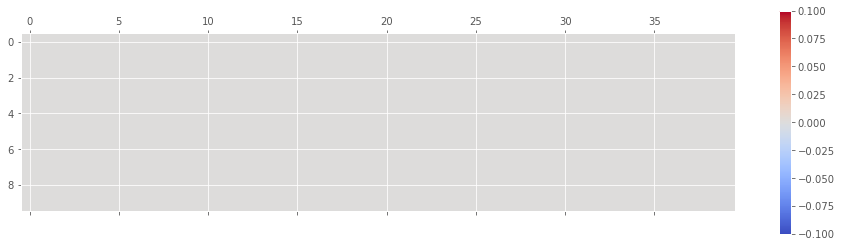

In [23]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap = colormap)
plt.colorbar()

([], [])

<Figure size 432x288 with 0 Axes>

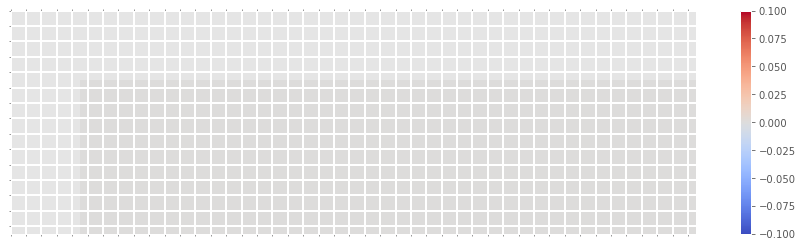

In [24]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap = colormap)
plt.colorbar()

ax = plt.gca()

ax.set_xticks(np.arange(-5, (width), 1), minor = True)
ax.set_yticks(np.arange(-5, (height), 1), minor = True)

ax.grid(which = 'minor', color = 'w', linestyle = '-', linewidth = 2)

plt.xticks([])
plt.yticks([])

In [25]:
from wordcloud import WordCloud, STOPWORDS
print('Wordcloud is intalled and imported')

Wordcloud is intalled and imported


In [26]:
alice_novel = open('alice_novel.txt', 'r').read()
print('Files downloaded and saved')

Files downloaded and saved


In [27]:
stopwords = set(STOPWORDS)

In [28]:
alice_wc = WordCloud(
            background_color = 'white',
            max_words = 2000,
            stopwords = stopwords
            )

alice_wc.generate(alice_novel)

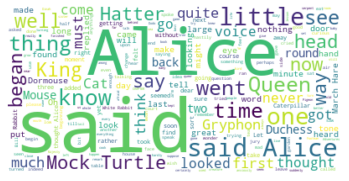

In [29]:
plt.imshow(alice_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

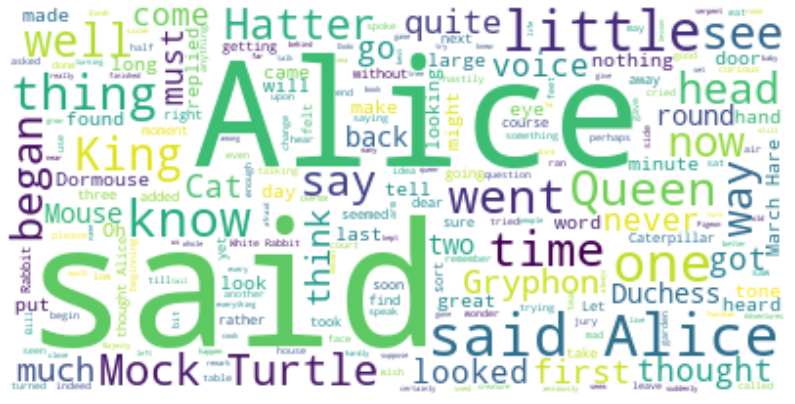

In [30]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show

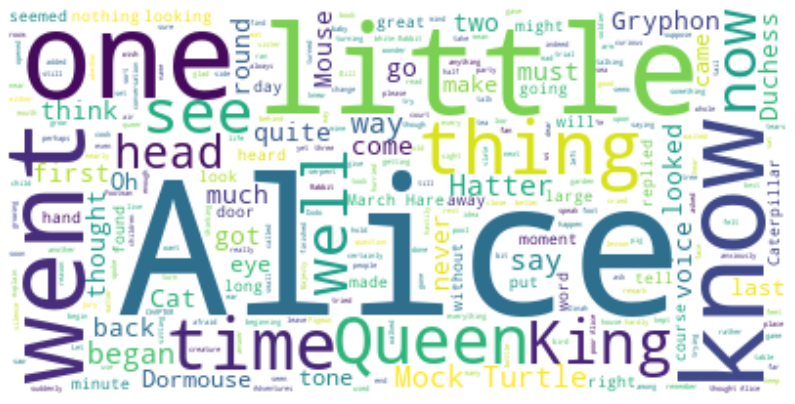

In [31]:
stopwords.add('said')

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [32]:
alice_mask = np.array(Image.open('Alice_mask.png'))
print('Image downloaded and saved')

Image downloaded and saved


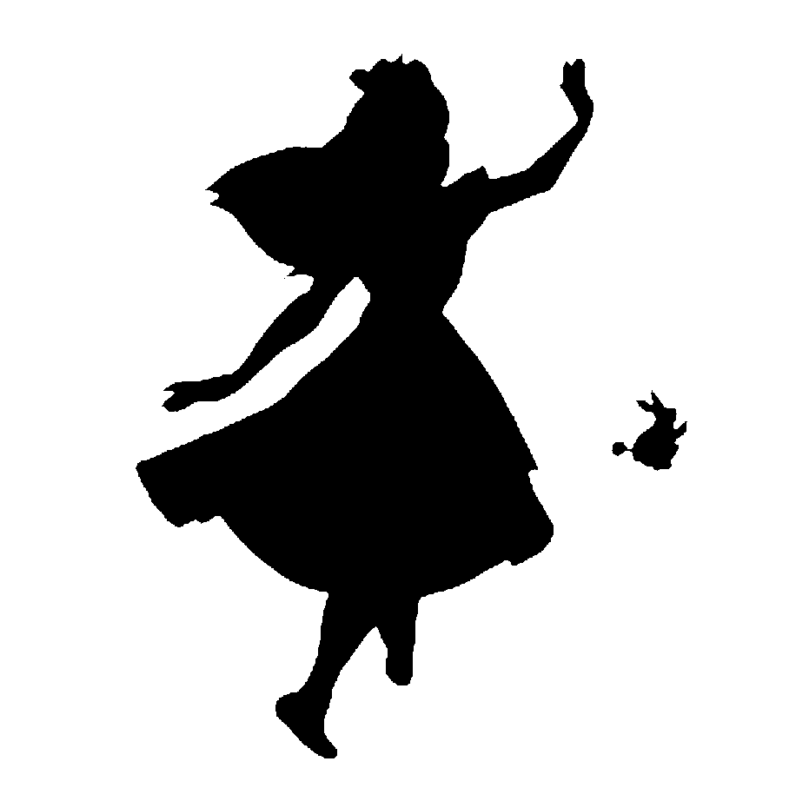

In [35]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_mask, cmap = plt.cm.gray, interpolation = 'bilinear')
plt.axis('off')
plt.show()

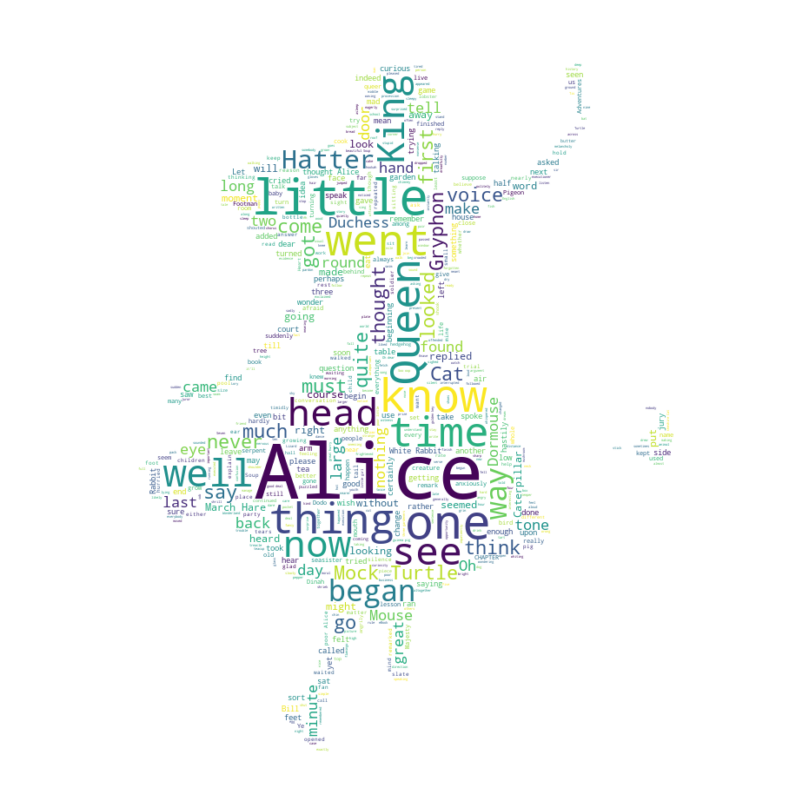

In [38]:
alice_wc = WordCloud(background_color = 'white', max_words = 2000, mask = alice_mask, stopwords = stopwords)

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [39]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58639.0
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15699.0
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69439.0
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0


In [40]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153.0

In [43]:
max_words = 90
word_string = ''
for country in df_can.index.values:
    if len(country.split(' ')) == 1:
        repeat_num_tiles = int(df_can.loc[country, 'Total'] / float(total_immigration) * max_words)
        word_string = word_string + ((country + ' ') * repeat_num_tiles)

word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [44]:
wordcloud = WordCloud(background_color = 'white').generate(word_string)
print('Word cloud created')

Word cloud created


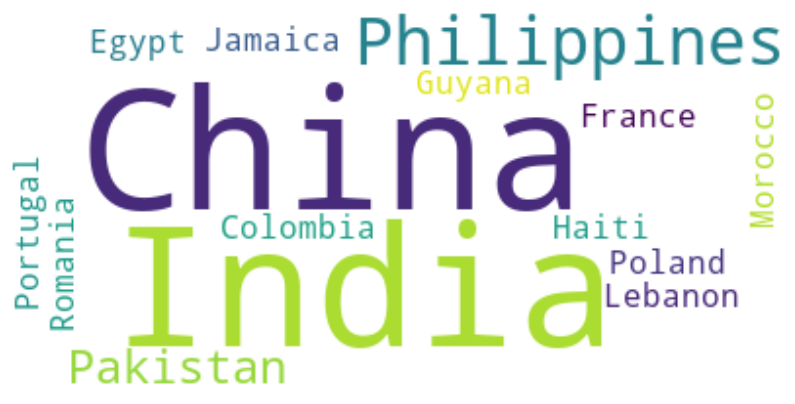

In [45]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [47]:
import seaborn as sns
print('Seaborn installed and imported')

Seaborn installed and imported


In [48]:
df_tot = pd.DataFrame(df_can[years].sum(axis = 0))
df_tot.index = map(float, df_tot.index)
df_tot.reset_index(inplace = True)
df_tot.columns = ['year', 'total']

df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


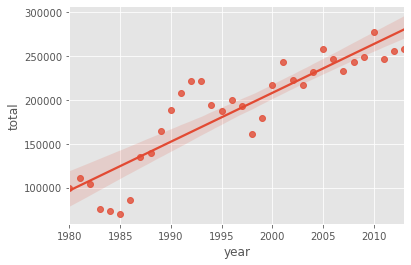

In [49]:
import seaborn as sns
ax = sns.regplot(x = 'year', y = 'total', data = df_tot)

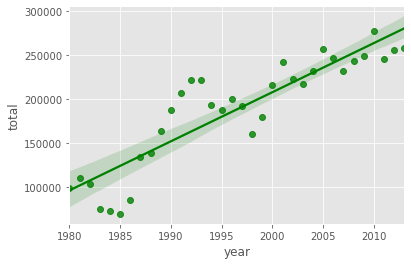

In [50]:
import seaborn as sns
ax = sns.regplot(x = 'year', y = 'total', data = df_tot, color = 'green')

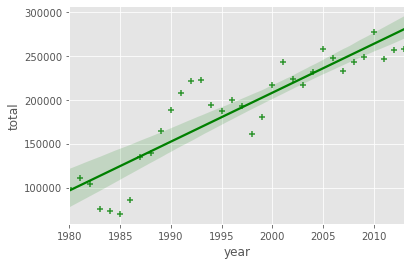

In [51]:
import seaborn as sns
ax = sns.regplot(x = 'year', y = 'total', data = df_tot, color = 'green', marker = '+')

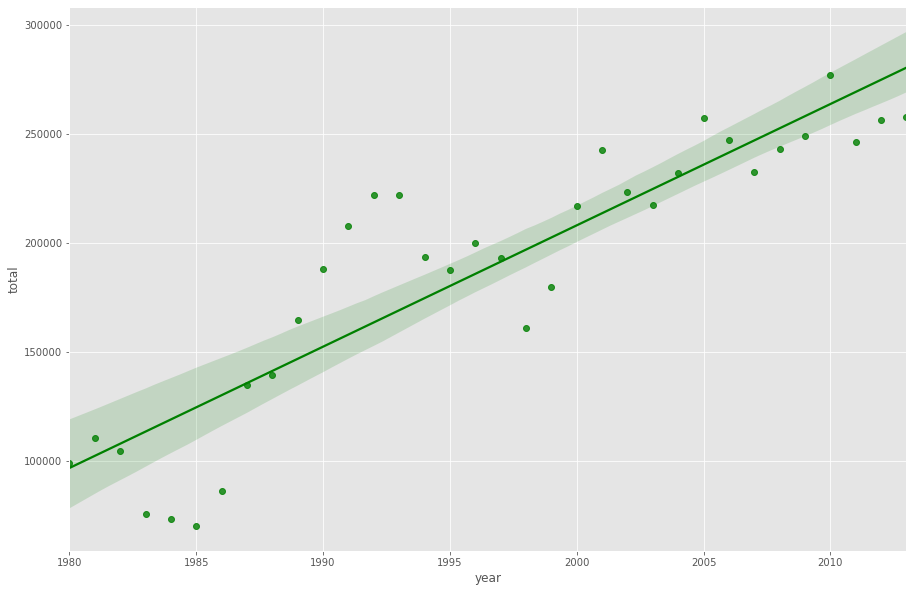

In [52]:
plt.figure(figsize = (15, 10))
ax = sns.regplot(x = 'year', y = 'total', data = df_tot, color = 'green')

In [1]:
import numpy as np
import pandas as pd

In [2]:
!pip install folium

In [3]:
import folium
print('Folium installed and imported')

Folium installed and imported


In [6]:
world_map = folium.Map()
world_map

In [8]:
world_map = folium.Map(location = [-6.992620, 110.428009], zoom_start = 11)
world_map

In [9]:
world_map = folium.Map(location = [-6.2607187, 106.7794275], zoom_start = 15)
world_map

In [11]:
world_map = folium.Map(location = [-6.9902851, 110.4207485], zoom_start = 13, tiles = 'Stamen Toner')
world_map

In [12]:
world_map = folium.Map(location = [-6.9902851, 110.4207485], zoom_start = 13, tiles = 'Stamen Terrain')
world_map

In [13]:
df_incidents = pd.read_csv('police_crime_incident_2016.csv')
print('Dataset downloaded and read into a pandas data frame')

Dataset downloaded and read into a pandas data frame


In [16]:
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [18]:
df_incidents.shape

(150500, 13)

In [19]:
limit = 100
df_incidents = df_incidents.iloc[0: limit, :]
df_incidents.shape

(100, 13)

In [28]:
latitude = 37.77
longitude = -122.42

sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)
sanfran_map

In [29]:
incidents = folium.map.FeatureGroup()

for lat, lng, in zip(df_incidents. Y, df_incidents. X):
    incidents.add_child(
    folium.CircleMarker(
    [lat, lng], radius = 5,
    color = 'yellow', fill = True, fill_color = 'blue',
    fill_opacity = 0.6)
    )

sanfran_map.add_child(incidents)

In [30]:
incidents = folium.map.FeatureGroup()

for lat, lng, in zip(df_incidents. Y, df_incidents. X):
    incidents.add_child(
    folium.CircleMarker(
    [lat, lng], radius = 5,
    color = 'yellow', fill = True, fill_color = 'blue',
    fill_opacity = 0.6)
    )

latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
label = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, label):
    folium.Marker([lat, lng], popup = label).add_to(sanfran_map)

    
sanfran_map.add_child(incidents)

In [33]:
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.CircleMarker(
    [lat, lng], radius = 5, color = 'yellow', fill = True,
    popup = label, fill_color ='blue', fill_opacity = 0.6).add_to(sanfran_map)

sanfran_map

In [36]:
from folium import plugins

sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)
incidents = plugins.MarkerCluster().add_to(sanfran_map)

for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
    location = [lat, lng],
    icon = None, popup = label,).add_to(incidents)
    
sanfran_map

In [37]:
!conda install -c anaconda xlrd --yes

Solving environment: ...working... done

# All requested packages already installed.



In [38]:
df_can = pd.read_excel('Canada.xlsx',
                      sheet_name ='Canada by Citizenship',
                      skiprows = range(20),
                      skipfooter = 2)

print('Data downloaded and read into a Data Frame')

Data downloaded and read into a Data Frame


In [39]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
print(df_can.shape)

(195, 51)


In [55]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis = 1, inplace = True)

df_can.rename(columns = {'OdName' : 'Country', 'AreaName' : 'Continent', 'RegName' : 'Region'}, inplace = True)

df_can.columns = list(map(str, df_can.columns))

df_can.set_index('Country', inplace = True)

df_can['Total'] = df_can.sum(axis = 1)

years = list(map(str, range (1980, 2014)))

print('data dimensions:', df_can.shape)

data dimensions: (195, 46)


In [56]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58639.0
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15699.0
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69439.0
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0


In [71]:
world_geo = r'world_countries.json'

world_map = folium.Map(location = [0,0], zoom_start = 2, tiles = "Stamen Terrain")

world_map.choropleth(geo_data = world_geo,
                    data = df_can,
                    columns =['Country', 'Total'],
                    key_on = 'feature.proporties.name',
                    fill_color = 'YlOrRd',
                    fill_opacity = 0.7, line_opacity = 0.2,
                    legend_name = 'Immigration to Canada'
                    )

world_map

KeyError: "None of ['Country'] are in the columns"